In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
branch = pd.read_csv('data/branch.csv')
branch

,p,execution_time
0,1.0,910
1,0.9,1800
2,0.8,1813
3,0.7,1822
4,0.6,1827
5,0.5,1827
6,0.4,1827
7,0.3,1830
8,0.2,1841
9,0.1,1841


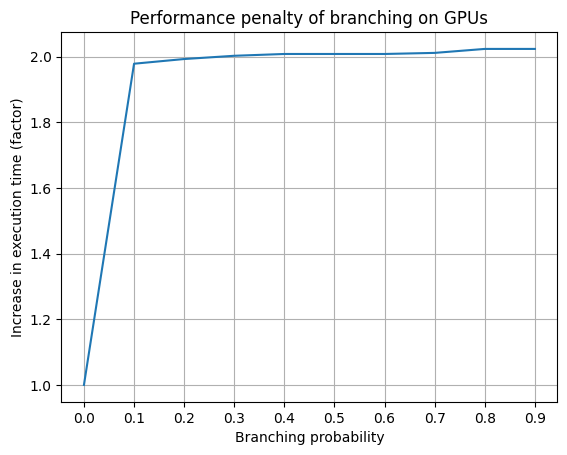

In [23]:
x = [1 - x for x in branch['p']]
y = [ x / branch['execution_time'][0] for x in  list(branch['execution_time'])]
plt.xticks(x)
plt.plot(x, y)
plt.xlabel('Branching probability')
plt.ylabel('Increase in execution time (factor)')
plt.title("Performance penalty of branching on GPUs")
plt.grid(True)
plt.show()

In [31]:
latency = pd.read_csv('data/latency.csv')
latency

,N,reads,threadCount,blockCount,latency
0,8192,131072,1,1,26.7886
1,16384,131072,1,1,91.3139
2,32768,131072,1,1,132.1220
3,65536,131072,1,1,143.0620
4,131072,131072,1,1,130.6470
...,...,...,...,...,...
58,134217728,262144,128,128,2150.5800
59,268435456,262144,128,128,2157.5600
60,536870912,262144,128,128,2164.4900
61,1073741824,262144,128,128,2165.0600


In [54]:
def sizeToKB(size):
    return (size * 8.) / (1 << 10)

In [55]:
latency['size'] = list(map(sizeToKB, latency['N']))
latency

,N,reads,threadCount,blockCount,latency,size
0,8192,131072,1,1,26.7886,64.0
1,16384,131072,1,1,91.3139,128.0
2,32768,131072,1,1,132.1220,256.0
3,65536,131072,1,1,143.0620,512.0
4,131072,131072,1,1,130.6470,1024.0
...,...,...,...,...,...,...
58,134217728,262144,128,128,2150.5800,1048576.0
59,268435456,262144,128,128,2157.5600,2097152.0
60,536870912,262144,128,128,2164.4900,4194304.0
61,1073741824,262144,128,128,2165.0600,8388608.0


In [56]:
one_thread = latency[(latency['threadCount'] == 1) & (latency['blockCount'] == 1)]
one_thread

,N,reads,threadCount,blockCount,latency,size
0,8192,131072,1,1,26.7886,64.0
1,16384,131072,1,1,91.3139,128.0
2,32768,131072,1,1,132.1220,256.0
3,65536,131072,1,1,143.0620,512.0
4,131072,131072,1,1,130.6470,1024.0
5,262144,131072,1,1,127.4810,2048.0
6,524288,131072,1,1,135.4460,4096.0
7,1048576,131072,1,1,204.3160,8192.0
8,2097152,131072,1,1,248.5670,16384.0
9,4194304,131072,1,1,259.7340,32768.0


In [57]:
one_block = latency[(latency['threadCount'] == 128) & (latency['blockCount'] == 1)]
one_block = one_block.iloc[3:]
one_block

,N,reads,threadCount,blockCount,latency,size
22,8192,262144,128,1,34.3774,64.0
23,16384,262144,128,1,148.3270,128.0
24,32768,262144,128,1,157.3080,256.0
25,65536,262144,128,1,159.6770,512.0
26,131072,262144,128,1,160.6400,1024.0
27,262144,262144,128,1,161.0510,2048.0
28,524288,262144,128,1,161.6700,4096.0
29,1048576,262144,128,1,338.4460,8192.0
30,2097152,262144,128,1,346.2790,16384.0
31,4194304,262144,128,1,348.8950,32768.0


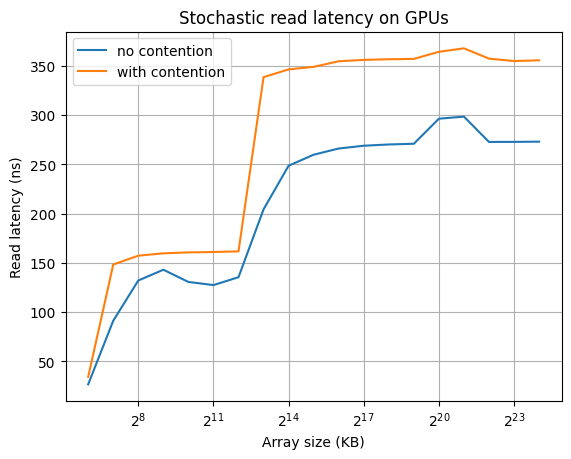

In [59]:
x = list(one_thread['size'])
y = list(one_thread['latency'])
plt.xticks(x)
plt.plot(x, y, label='no contention')
plt.xlabel('Array size')
plt.ylabel('Read latency (ns)')
plt.xscale('log', base=2)
plt.title("Stochastic read latency on GPUs")
plt.grid(True)


x = list(one_block['size'])
y = list(one_block['latency'])
plt.xticks(x)
plt.plot(x, y, label='with contention')
plt.xlabel('Array size (KB)')
plt.ylabel('Read latency (ns)')
plt.xscale('log', base=2)
plt.title("Stochastic read latency on GPUs")
plt.grid(True)
plt.legend()
plt.show()